<a href="https://colab.research.google.com/github/ChallaAashritha/zeotapassignment/blob/main/FirstName_LastName_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load the data

In [ ]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

Data Inspection

In [ ]:
print("--- Customers Data ---")
print(customers.head())
print(customers.info())
print(customers.isnull().sum())
print(customers.describe(include='all'))

print("\n--- Products Data ---")
print(products.head())
print(products.info())
print(products.isnull().sum())
print(products.describe(include='all'))

print("\n--- Transactions Data ---")
print(transactions.head())
print(transactions.info())
print(transactions.isnull().sum())
print(transactions.describe(include='all'))

--- Customers Data ---
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
uniqu

Data Cleaning

In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

merging datatset


In [ ]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')
print(merged_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [ ]:
print("\nDescriptive Statistics:\n", merged_data.describe())
print("\nMissing Values:\n", merged_data.isnull().sum())


Descriptive Statistics:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%             

Data Visualization for Insights

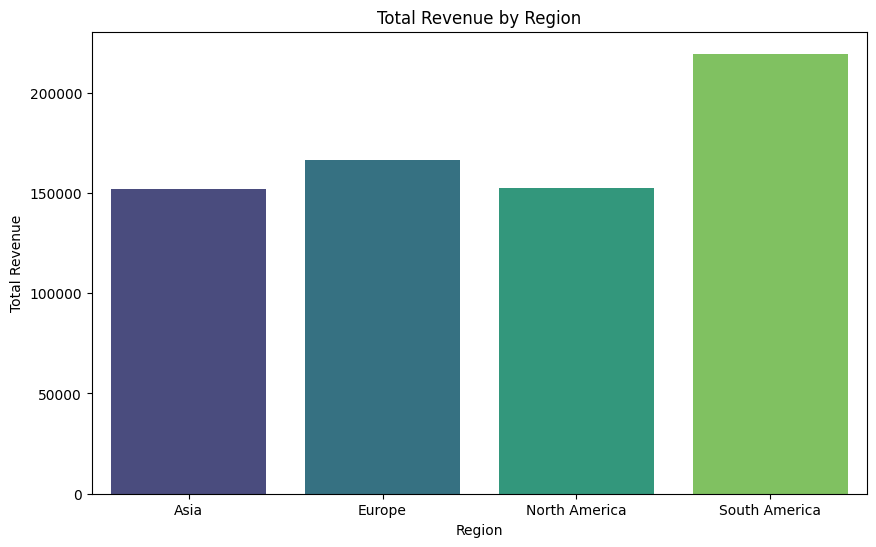

In [33]:
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=revenue_by_region, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

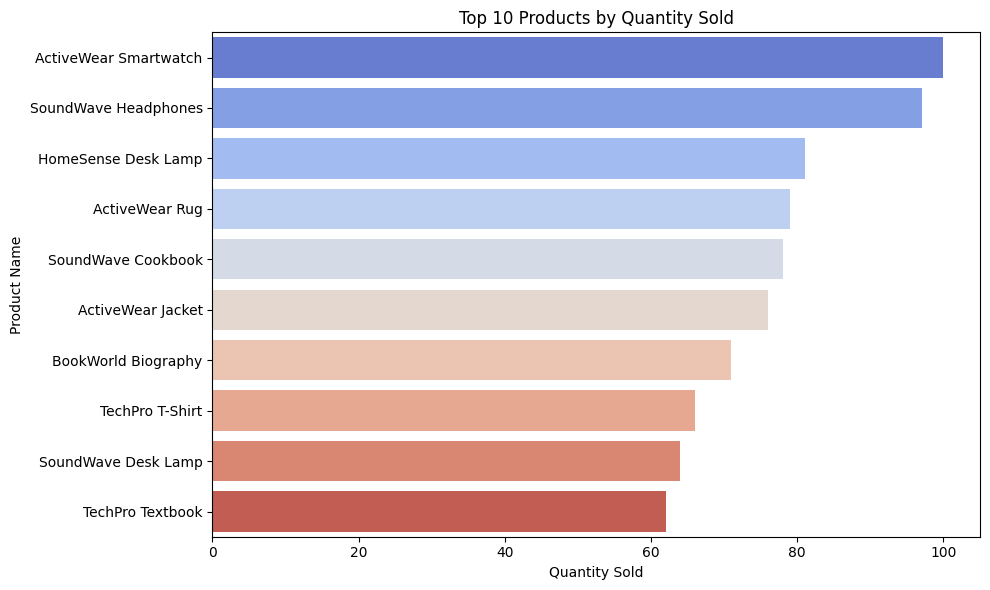

In [ ]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=top_products, palette='coolwarm')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

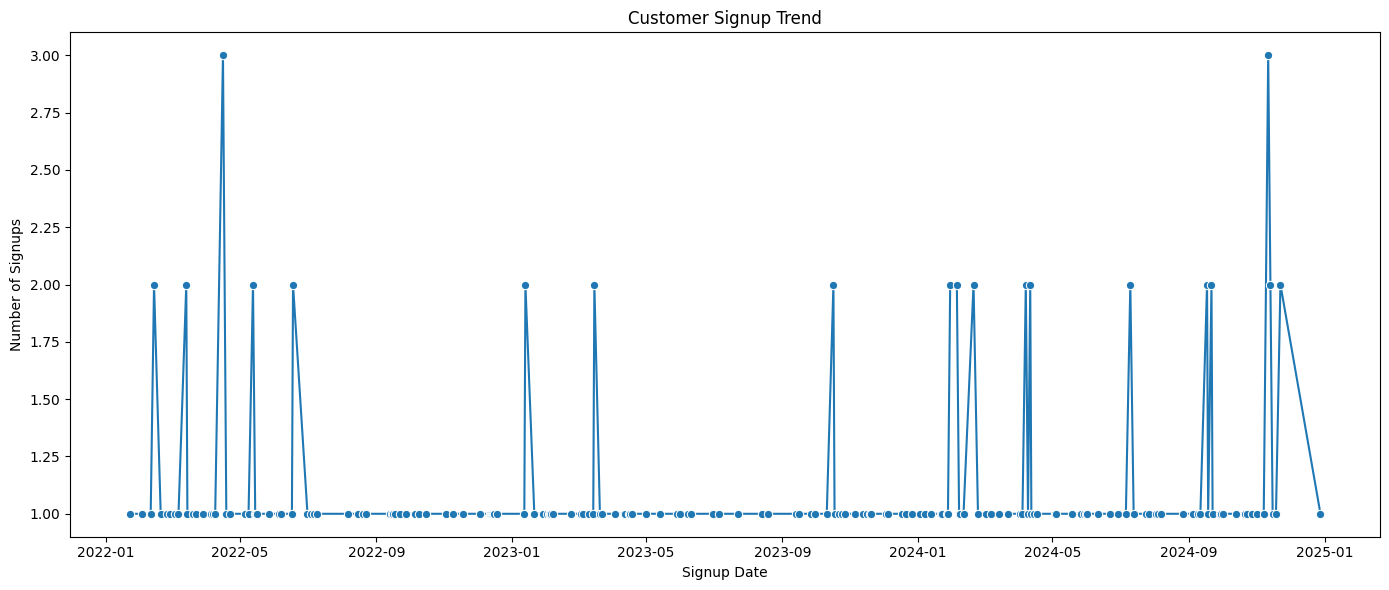

In [ ]:
daily_signups = customers.groupby(customers['SignupDate'].dt.date)['CustomerID'].count().reset_index()
daily_signups.rename(columns={'CustomerID': 'SignupCount'}, inplace=True)
plt.figure(figsize=(14, 6))
sns.lineplot(x='SignupDate', y='SignupCount', data=daily_signups, marker='o')
plt.title('Customer Signup Trend')
plt.xlabel('Signup Date')
plt.ylabel('Number of Signups')
plt.tight_layout()
plt.show()

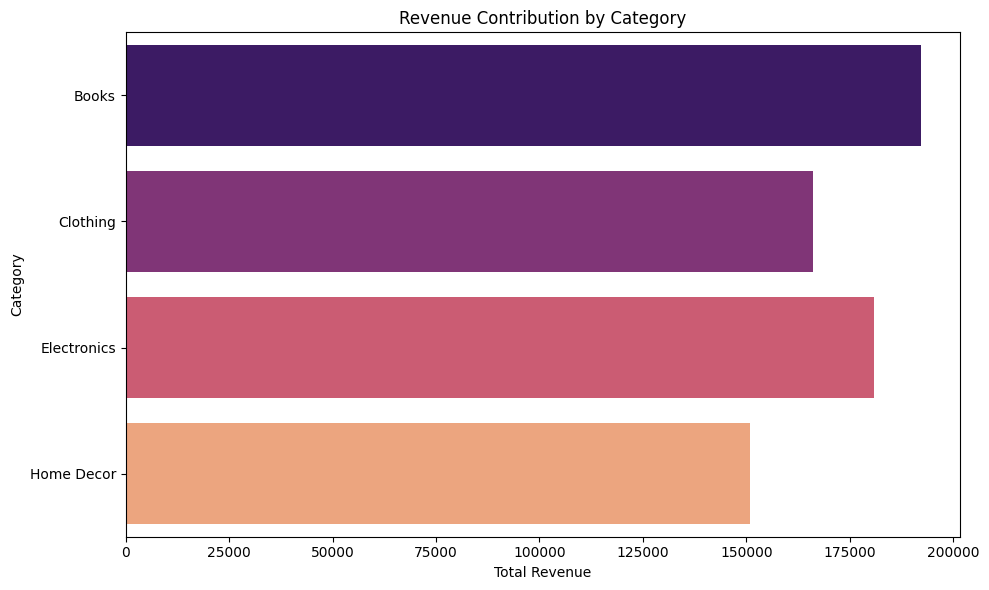

In [ ]:
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='Category', data=revenue_by_category, palette='magma')
plt.title('Revenue Contribution by Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

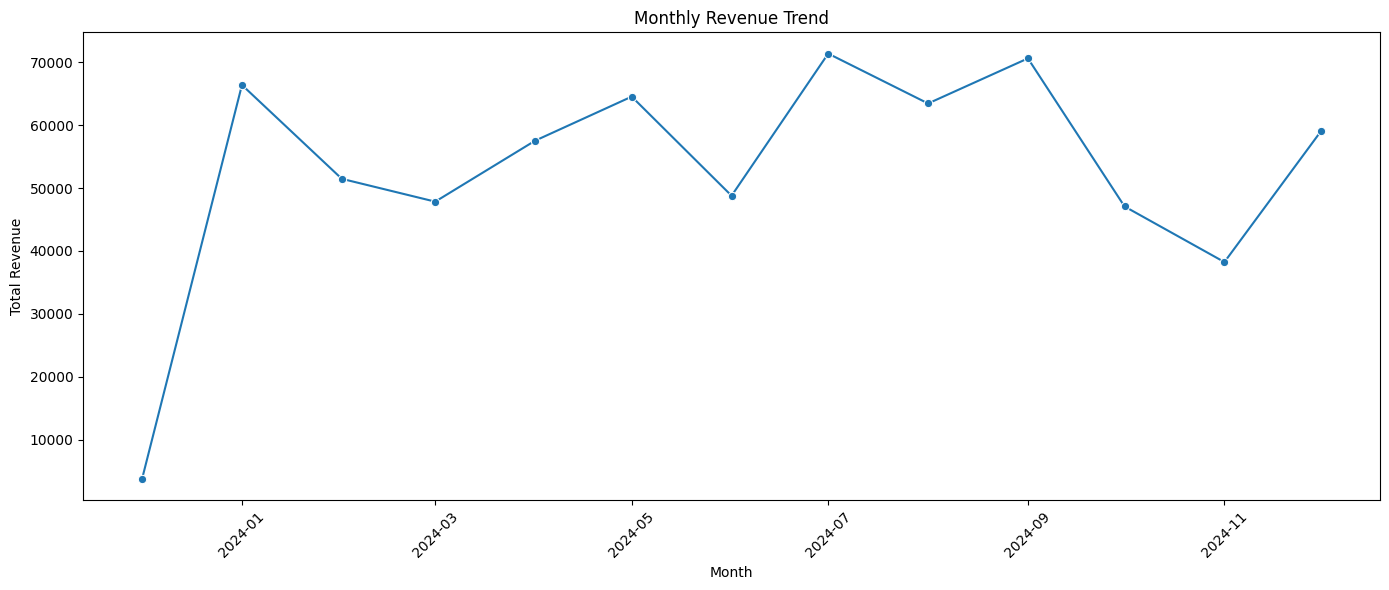

In [ ]:
# Convert Month to string format (YYYY-MM) for plotting
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M').astype(str)

# Group data by Month and calculate total revenue
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum().reset_index()

# Sort the Month column to ensure proper chronological order
monthly_revenue['Month'] = pd.to_datetime(monthly_revenue['Month'])
monthly_revenue = monthly_revenue.sort_values(by='Month')

# Plot the Monthly Revenue Trend
plt.figure(figsize=(14, 6))
sns.lineplot(x='Month', y='TotalValue', data=monthly_revenue, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()